Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def changeImg(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    nombre_color = ""
    imgSalida = np.zeros((alto,ancho, 3)) #Lienzo, arreglo para RGB
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            # Extraccion de canales
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                imgSalida[i,j] = [blue,0,0]
                nombre_color = "Blue"
            elif(color == 2):
                imgSalida[i,j] = [0,green,0]
                nombre_color = "Green"
            elif(color == 3):
                imgSalida[i,j] = [0,0,red]
                nombre_color = "Red"
            elif(color == 10):
                imgSalida[i,j] = [0,green,red]
                nombre_color = "Red_Verde"
            elif(color == 20):
                imgSalida[i,j] = [blue,green,0]
                nombre_color = "Green_Blue"
            elif(color == 30):
                imgSalida[i,j] = [blue,0,red]
                nombre_color = "Blue_Red"
                
    write_and_show(imgSalida,nombre_color) 

In [13]:
#Funcion para escribir a disco y mostrar imagen.
def write_and_show(imgSalida,color):
    cv2.imwrite("GIANT_"+color+".jpg", imgSalida)
    imgTemp = cv2.imread("GIANT_"+color+".jpg")
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

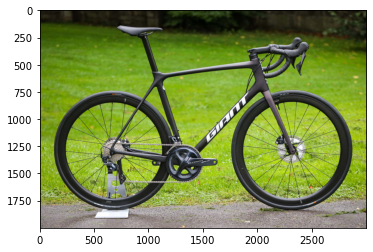

In [14]:
#Cargando y visualizando imagen a convertir
img = cv2.imread('GIANT_Original.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

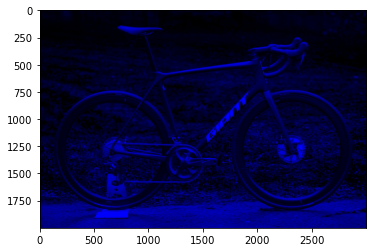

In [15]:
#Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
changeImg(img,1)

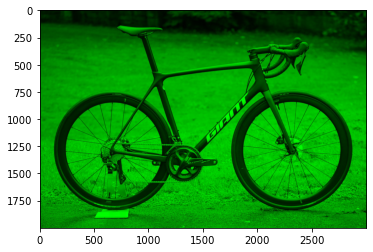

In [16]:
#Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
changeImg(img,2)

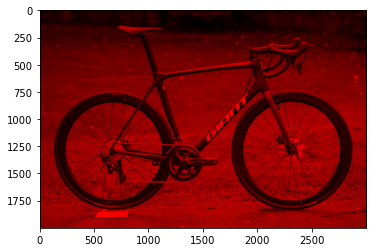

In [17]:
#Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
changeImg(img,3)

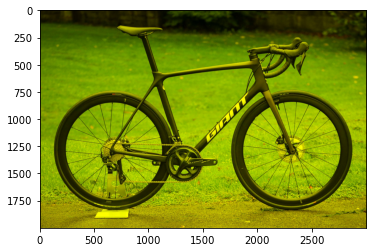

In [18]:
#Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
changeImg(img,10)

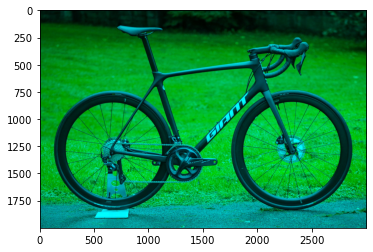

In [19]:
#Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
changeImg(img,20)

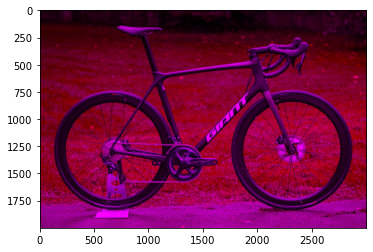

In [10]:
#Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
changeImg(img,30)

Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una
funcion que dadas las 3 imagenes se construya la imagen original a color.

Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [10]:
img = cv2.imread("Audi_A5_Original.jpg")

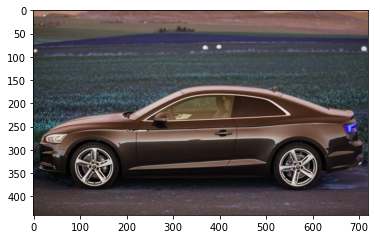

In [11]:
plt.imshow(img)
alto = img.shape[0]
ancho = img.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [12]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [13]:
def write_and_show(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

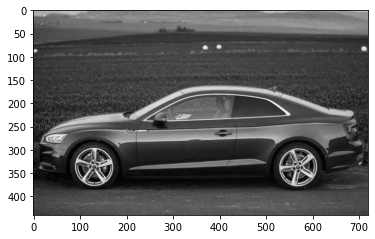

In [14]:
write_and_show("Audi_A5_gray_rojo.jpg",gray_red)

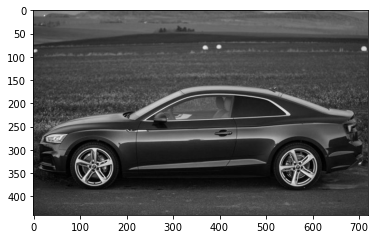

In [15]:
write_and_show("Audi_A5_gray_verde.jpg",gray_green)

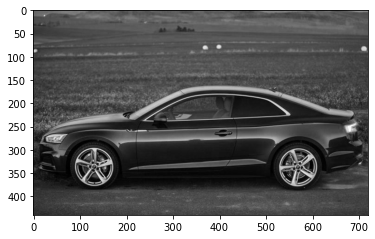

In [16]:
write_and_show("Audi_A5_gray_azul.jpg",gray_blue)

Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media
de la distribucion.

In [17]:
imgP = cv2.imread('Regal_Original.jpg')
imgP = cv2.cvtColor(imgP, cv2.COLOR_BGR2RGB)

In [18]:
def grafic(img,tit):
    im=img
    fig, axs = plt.subplots(1,2, figsize=(35, 10))
    fig.suptitle(tit,fontsize=35)
    color = ('b', 'g', 'r') 
    
    for i, col in enumerate(color): 
        histr = cv2.calcHist([im],[i], None,[256],[0, 256])
        axs[1].set_title('Histograma',fontsize=20)
        axs[1].plot(histr, color = col)
        axs[1].axis(xmin=0,xmax=256)
    axs[0].set_title('Imagen',fontsize=20)
    axs[0].imshow(im, origin='upper')
    plt.show()
    return(None)

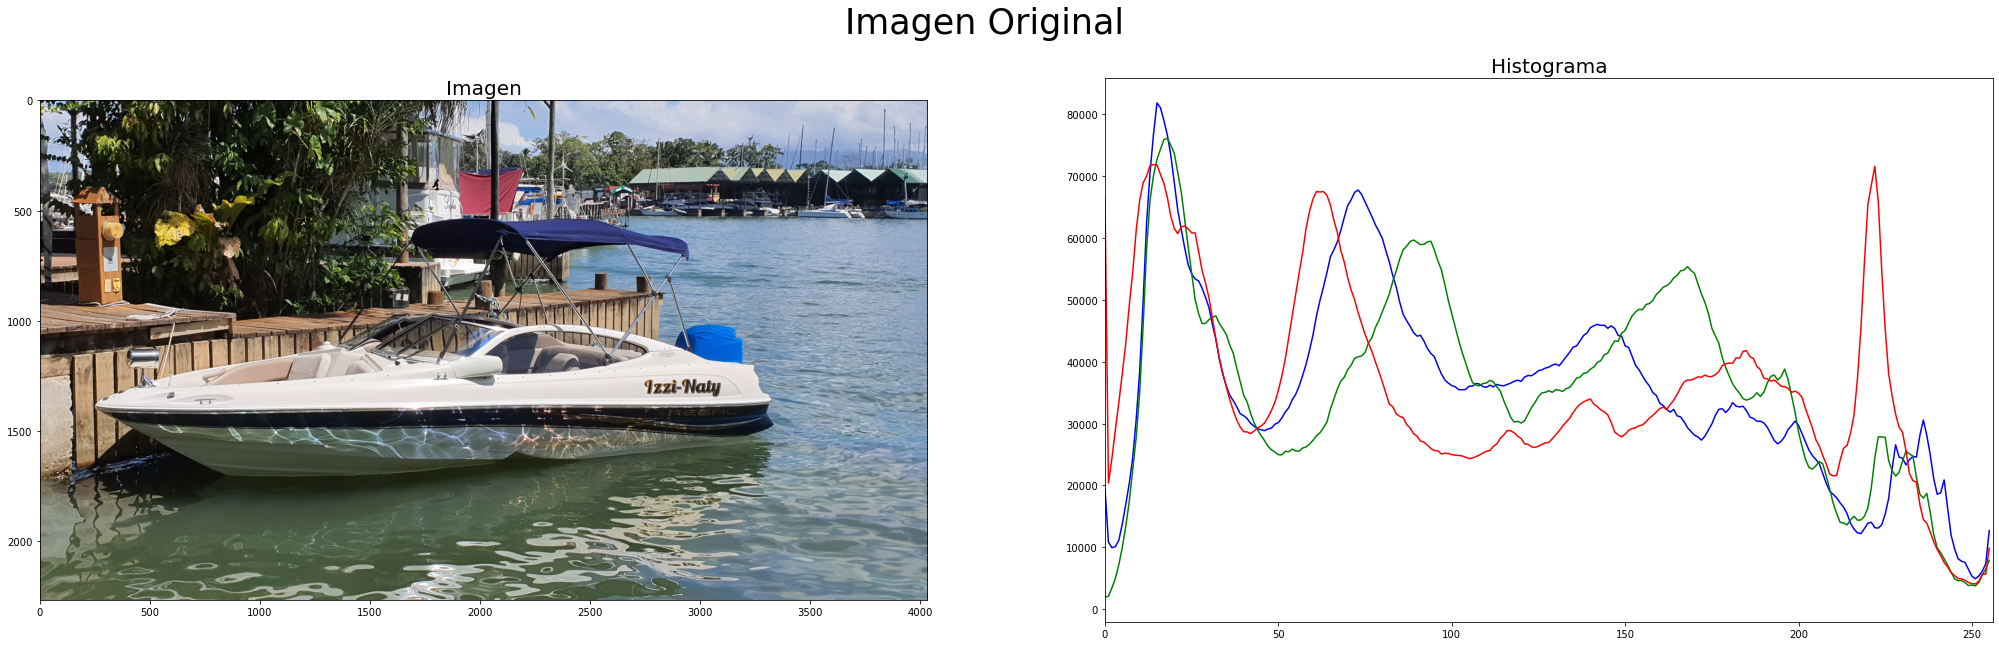

In [19]:
grafic(imgP,"Imagen Original")

Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

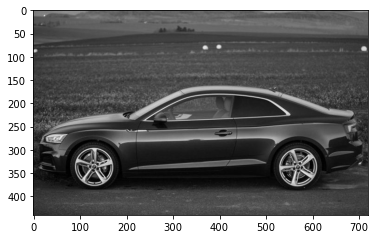

In [20]:
write_and_show("gray_ponderado.jpg",gray_ponderado)

Metodo de media ponderada:

Después del encanecimiento, los valores de R, G y B se ponderan y promedian de acuerdo con un cierto peso.

Es el peso de R, G y B respectivamente, y se utilizan diferentes valores para formar diferentes imágenes en escala de grises. Dado que el ojo humano es el más sensible al verde, el rojo es el segundo y el menos sensible al azul, por lo que obtendrá una imagen gris que será más fácil de identificar. Generalmente, la imagen en escala de grises obtenida por tiene el mejor efecto



Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajo los demas ejercicios.

El modelo HSV (del inglés Hue, Saturation, Value – Matiz, Saturación, Valor), también llamado HSB (Hue, Saturation, Brightness – Matiz, Saturación, Brillo), define un modelo de color en términos de sus componentes.

Es común que deseemos elegir un color adecuado para alguna de nuestras aplicaciones, cuando es así resulta muy útil usar la ruleta de color HSV. En ella el matiz se representa por una región circular; una región triangular separada, puede ser usada para representar la saturación y el valor del color. Normalmente, el eje horizontal del triángulo denota la saturación, mientras que el eje vertical corresponde al valor del color. De este modo, un color puede ser elegido al tomar primero el matiz de una región circular, y después seleccionar la saturación y el valor del color deseados de la región triangular.
